# LearnPlatform COVID-19 Impact on Digital Learning Analysis


![](https://tishadz.com/wp-content/uploads/2021/04/overview-of-online-learning.png)

### **Motivation**


Current research shows educational outcomes are far from equitable. The imbalance was exacerbated by the COVID-19 pandemic. There's an urgent need to better understand and measure the scope and impact of the pandemic on these inequities.

Education technology company ***LearnPlatform*** was founded in 2014 with a mission to expand equitable access to education technology for all students and teachers. LearnPlatform’s comprehensive edtech effectiveness system is used by districts and states to continuously improve the safety, equity, and effectiveness of their educational technology. LearnPlatform does so by generating an evidence basis for what’s working and enacting it to benefit students, teachers, and budgets.

In this notebook, I’ll work to uncover trends in digital learning with data analysis about how engagement with digital learning relates to factors like district demographics, broadband access, and state/national level policies and events. 


### Problem statement
- What is the state of digital learning in 2020? 
- And how does the engagement of digital learning relate to factors such as:
    - district demographics, 
    - broadband access, and 
    - state/national level policies and events?
- What is the picture of digital connectivity and engagement in 2020?
- What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
- How does student engagement with different types of education technology change over the course of the pandemic?
- How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
- Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?


## **Exploratory data analysis (EDA)**
Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In this analytics challenge, we are given multiple .csv files [here](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data). The main information contained in these files is which tools are used with what engagement in which school district in the United States of America in 2020. [Read the Data Description](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data) 

The **[districts_info.csv file](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data)** contains information about each school district and the **[products_info.csv](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data?select=products_info.csv)** file contains information about the top 370 tools used for digital learning. For each school district, there is an additional file that contains the engagement for each tool for everyday in 2020. 

The files can be joined by the key columns ***district_id*** and ***lp_id***.

# Importing the neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import glob

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

### My utility scripts

In [ ]:
# A function for calculating the missing values in dataset in percent
def percent_missing(df: pd.DataFrame):
    # Calculate total  number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    return print("The dataset contains", round(((totalMissing / totalCells) * 100), 2), "%", "missing values.")


# A function to see the percentage of missing values of every columns
def every_column_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_db = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    missing_value_db.sort_values('percent_missing', inplace=True)

    print(missing_value_db)
    
#PLOTING FUNCTIONS

def plot_hist(df: pd.DataFrame, column: str, color: str) -> None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_dist(df: pd.DataFrame, column: str):
    plt.figure(figsize=(9, 7))
    sns.distplot(df).set_title(f'Distribution of {column}')
    plt.show()


def plot_count(df: pd.DataFrame, column: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    plt.show()


def plot_bar(df: pd.DataFrame, x_col: str, y_col: str, title: str, xlabel: str, ylabel: str) -> None:
    plt.figure(figsize=(9, 7))
    sns.barplot(data=df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()


def plot_heatmap(df: pd.DataFrame, title: str, cbar=False) -> None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0,
                vmax=1, fmt='.2f', linewidths=.7, cbar=cbar)
    plt.title(title, size=18, fontweight='bold')
    plt.show()


def plot_box(df: pd.DataFrame, x_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()


def plot_box_multi(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()


def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    
    
def bar_plot(x, y, title, palette_len, xlim = None, ylim = None, 
             xticklabels = None, yticklabels = None, 
             top_visible = False, right_visible = False, 
             bottom_visible = True, left_visible = False,
             xlabel = None, ylabel = None, figsize = (10, 4),
             axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)

    sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("viridis", len(palette_len))))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    
    ax.set_xticklabels(xticklabels, fontfamily = 'serif')
    ax.set_yticklabels(yticklabels, fontfamily = 'serif')
    plt.xlabel(xlabel, fontfamily = 'serif')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()
    
    
def line_plot(data, y, title, color,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (10, 4), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)
    
    sns.lineplot(x = range(len(data[y])), y = data[y], dashes = False, 
                 color = color, linewidth = .5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    
    ax.set_xticks([])
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()
    
    
def corr_plot(data,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (15, 11), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title('Correlations (Pearson)', size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    mask = np.triu(np.ones_like(data.corr(), dtype = bool))
    sns.heatmap(round(data.corr(), 2), mask = mask, cmap = 'viridis', annot = True)
    plt.show()
    
def columns_viz(data, color):
    for i in range(len(data.columns)):
        line_plot(data = data, y = data.columns[i],
                  color = color,
                  title = '{} dynamics'.format(data.columns[i]),
                  bottom_visible = False, figsize = (10, 2))

In [ ]:
districts_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
products_info = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
eng_path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data'

In [ ]:
## Merging all the engagement data
eng_files = glob.glob(eng_path + "/*.csv")

files = []

for file in eng_files:
    df = pd.read_csv(file, index_col = None, header = 0)
    district_id = file.split('/')[4].split('.')[0]
    df['district_id'] = district_id
    files.append(df)
    
engagement = pd.concat(files)
engagement = engagement.reset_index(drop = True)
engagement['time'] = pd.to_datetime(engagement['time'])

In [ ]:
datasets = [districts_info, products_info, engagement]
datasets_names = ['districts_info','products_info','engagement']

### EXPLORING THE NAN VALUES

In [ ]:
for i in range(len(datasets)):
    NaN_values = (datasets[i].isnull().sum() / len(datasets[i]) * 100).sort_values(ascending = False)
    bar_plot(x = NaN_values, 
             y = NaN_values.index,
             title = '{}: NaN values (%)'.format(datasets_names[i]),
             palette_len = NaN_values.index, 
             xlim = (0, 100), 
             xticklabels = range(0, 101, 20),
             yticklabels = NaN_values.index,
             left_visible = True,
             figsize = (10, 8), axis_grid = 'x')

## EDA on Districts_info.csv 

In [ ]:
districts_info.head()

In [ ]:
print(f" There are {districts_info.shape[0]} rows and {districts_info.shape[1]} columns")

In [ ]:
# Basic statsitcal discription on numerical columns
districts_info.describe()

## Missing Values on Districts_info.csv & cleaning 

In [ ]:
# Checking for null values
districts_info.isnull().sum()

In [ ]:
percent_missing(districts_info)

As we can see there are ***27.1 percent missing*** values in the **districts_info.csv**

Let's check the percentage missing values by column

In [ ]:
every_column_percent_missing(districts_info)

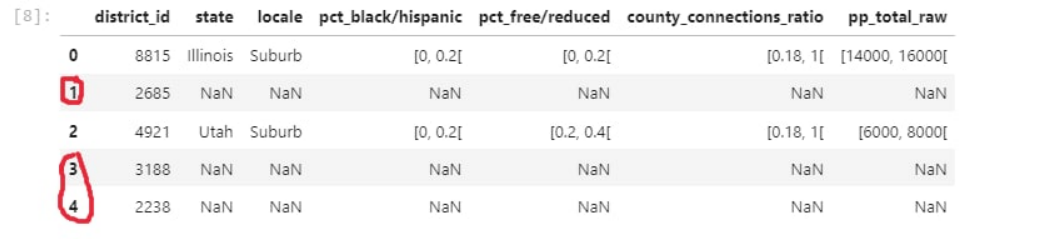

There are **NaN** rows in the dataset. 

USE **df.dropna()** TO DROP ROWS WITH NaN FROM A PANDAS DATAFRAME

In [ ]:
districts_cleaned = districts_info.dropna()

In [ ]:
print(f" There are {districts_cleaned.shape[0]} rows and {districts_cleaned.shape[1]} columns")

**Droping the NAN values out of 233 rows we've left with 88 rows**

In [ ]:
every_column_percent_missing(districts_cleaned)

In [ ]:
percent_missing(districts_cleaned)

In [ ]:
districts_cleaned.duplicated().sum()

### Missing Values on products_info.csv & cleaning 

In [ ]:
products_info.head()

In [ ]:
products_info.describe()

In [ ]:
print(f" There are {products_info.shape[0]} rows and {products_info.shape[1]} columns")

In [ ]:
products_info.isnull().sum()

In [ ]:
percent_missing(products_info)

In [ ]:
every_column_percent_missing(products_info)

In [ ]:
products_cleaned = products_info.dropna()

In [ ]:
percent_missing(products_cleaned)

In [ ]:
print(f" There are {products_cleaned.shape[0]} rows and {products_cleaned.shape[1]} columns")

## Let's check the distributions of districts dataset with some plots 

In [ ]:
plot_hist(districts_cleaned,'state','green')
plot_hist(districts_cleaned,'locale','orange')
plot_hist(districts_cleaned,'pct_black/hispanic','red')
plot_hist(districts_cleaned,'pct_free/reduced','blue')
plot_hist(districts_cleaned,'pp_total_raw','green')

## Let's check the distributions of products dataset with some plots 

In [ ]:
plot_hist(products_cleaned,'Sector(s)','red')

## Exploring the engagement data

In [ ]:
engagement.head()

In [ ]:
print(f" There are {engagement.shape[0]} rows and {engagement.shape[1]} columns")

In [ ]:
every_column_percent_missing(engagement)

In [ ]:
percent_missing(engagement)

In [ ]:
engagement_cleaned = engagement.dropna()

In [ ]:
percent_missing(engagement_cleaned)

In [ ]:
datasets = [districts_cleaned, products_cleaned, engagement_cleaned]
datasets_names = ['districts_cleaned','products_cleaned','engagement_cleaned']

In [ ]:
columns_viz(datasets[0], color = '#900C3F')

Information about pct_black/hispanic, pct_free/reduced, county_connections_ratio and pp_total_raw is presented in the form of intervals, where "[a, b[" means that a ≤ x < b. All values in pct_black/hispanic and pct_free/reduced values have an interval of 20%, for a more understandable view we can convert them to a single value with a deviation of +- 10%. The information about county_connections_ratio is represented by the most abstract value from 18% to 100% and, unfortunately, this information is of no use. All values of of pp_total_raw have an interval of 2000, following the example of the previous two columns, we convert the values to a single value with a deviation of +- 1000.

In [ ]:
for i in ['pct_black/hispanic', 'pct_free/reduced']:
    districts_cleaned[i] = districts_cleaned[i].apply(lambda x: float(x.split(',')[0][1:]) + 0.1)

districts_cleaned['pp_total_raw'] = districts_cleaned['pp_total_raw'].apply(lambda x: int(x.split(',')[0][1:]) + 1000)

districts_cleaned.drop('county_connections_ratio', axis = 1, inplace = True)

districts_cleaned.head(3)

In [ ]:
products_cleaned.head(3)

In [ ]:
plt.figure(figsize = (15, 8))
a = sns.barplot(data = districts_cleaned['state'].value_counts().reset_index(), x = 'state', y = 'index', color = '#90afc5')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, color = '#900C3F')
plt.title('Distribution over states',fontweight = 'bold', fontfamily = 'serif', fontsize = 20, color = '#000000')
plt.ylabel('States')
plt.xlabel('Distribution')
a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
    
for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 15, color = '#283655')
plt.show()


In [ ]:
dist_area_group = districts_cleaned.groupby('locale').agg({'pct_black/hispanic': 'mean', 'pct_free/reduced': 'mean', 'pp_total_raw': 'mean'}).reset_index()

colors = ['#00FFFF', '#0000FF', '#808000']

fig = plt.figure(figsize = (13, 12))
for i in range(len(dist_area_group.columns.tolist()[1:])):
    plt.subplot(2, 2, i+1)
    sns.set_style("white")
    plt.title(dist_area_group.columns.tolist()[1:][i], fontweight = 'bold', fontfamily = 'serif', fontsize = 20, y = 1.09, color = colors[i])
    plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
    a = sns.barplot(data = dist_area_group, x = 'locale', y = dist_area_group.columns.tolist()[1:][i], color = colors[i])
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontweight = 'bold', fontfamily = 'serif', fontsize = 20)
    plt.yticks([])
    
    for j in ['right', 'top', 'left']:
        a.spines[j].set_visible(False)
    for j in ['bottom']:
        a.spines[j].set_linewidth(1.4)
      
    if i < 2:
        for p in a.patches:
            height = p.get_height()
            a.annotate(f'{int(height*100)} %', (p.get_x() + p.get_width() / 2, p.get_height()-0.03), 
                   ha = 'center', va = 'center', 
                   size = 18,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   color = 'white',
                   fontname = 'monospace')
    else:
        for p in a.patches:
            height = p.get_height()
            a.annotate(f'{int(height)} $', (p.get_x() + p.get_width() / 2, p.get_height()-1000), 
                   ha = 'center', va = 'center', 
                   size = 18,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   color = 'white',
                   fontname = 'monospace')
            
plt.figtext(0.07, 1.05, 'Characteristics of school districts by locale', fontsize = 30, fontname = 'monospace', color = '#283655')


fig.tight_layout(pad = 3)

plt.show()

The largest count of students who identified themselves as Black or Hispanic are in large cities.
The smallest count is in the suburbs and rural areas.

In cities and towns half of the students are eligible
for free or reduced-price lunch.

The highest total expenses per student is in rural area.

In [ ]:
plt.figure(figsize = (15, 8))
sns.set_style("white")
plt.title('TOP-15 providers', size = 35, x = 0.48, y = 1.06, fontweight = 'bold', fontfamily = 'serif', fontsize = 20, color = '#283655')
a = sns.barplot(data = products_cleaned['Provider/Company Name'].value_counts().reset_index().head(15), x = 'Provider/Company Name', y = 'index', color = '#90afc5')
plt.xticks([])
plt.yticks(fontweight = 'bold', fontfamily = 'serif', fontsize = 20, color = '#283655')
plt.ylabel('')
plt.xlabel('')

a.spines['left'].set_linewidth(1.5)
for w in ['right', 'top', 'bottom']:
    a.spines[w].set_visible(False)
#counting the numbers
for p in a.patches:
    width = p.get_width()
    plt.text(0.5 + width, p.get_y() + 0.55 * p.get_height(), f'{int(width)}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 15, color = '#000000')

plt.show()

In [ ]:
#Code credit Dimtry Uraov
state_abb = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

districts_cleaned['state_abb'] = districts_cleaned['state'].map(state_abb)

fig = go.Figure()
layout = dict(
    title_text = "Count of districts in the available States",
    title_font = dict(
            family = "monospace",
            size = 25,
            color = "black"
            ),
    geo_scope = 'usa'
)

fig.add_trace(
    go.Choropleth(
        locations = districts_cleaned['state_abb'].value_counts().to_frame().reset_index()['index'],
        zmax = 1,
        z = districts_cleaned['state_abb'].value_counts().to_frame().reset_index()['state_abb'],
        locationmode = 'USA-states',
        marker_line_color = 'white',
        geo = 'geo',
        colorscale = "cividis", 
    )
)
            
fig.update_layout(layout)   
fig.show()

In [ ]:
districts_cleaned

In [ ]:
fig = px.pie(districts_cleaned['locale'].value_counts().reset_index().rename(columns = {'locale': 'count'}), values = 'count', names = 'index', width = 700, height = 700)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.7, 
                  marker = dict(colors = ['#90afc5','#336b87','#2a3132','#763626'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = ' The count of districts <br>in each type <br>of areas', 
                                      x = 0.5, y = 0.5, font_size = 26, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

In [ ]:
products_cleaned


In [ ]:
engagement_cleaned

### Merging all the data together

In [ ]:
merged_data = pd.merge(products_cleaned, engagement_cleaned, left_on = 'LP ID', right_on = 'lp_id')
merged_data['district_id'] = merged_data['district_id'].astype('int64')
merged_data = pd.merge(merged_data, districts_cleaned, on = 'district_id')
merged_data.drop(['URL', 'lp_id', 'state_abb'], axis = 1, inplace = True)
merged_data.head(3)

In [ ]:
num_data = merged_data[['engagement_index', 'pct_black/hispanic', 'pct_free/reduced',
                                 'pct_access',  'pp_total_raw']]
data_correlation = num_data.corr()
plot_heatmap(data_correlation, 'Numerical Data Correlation')
data_correlation

- We can see that **pct_access** and **engagement_index** are highly positvely corelated as expected.
- Interestingly **Pct_free/reduced** and **pct_black/hispanic** are also highly positively corelated

### Top 10's pie plot to help visualisation the distribution 

In [ ]:
top3 = merged_data['pct_access'].value_counts().head(10)
top3.plot.pie(figsize=(12, 12))

In [ ]:
top3 = merged_data['state'].value_counts().head(10)
top3.plot.pie(figsize=(12, 12))

In [ ]:
top3 = merged_data['locale'].value_counts().head(10)
top3.plot.pie(figsize=(12, 12))

In [ ]:
top3 = merged_data['Primary Essential Function'].value_counts().head(10)
top3.plot.pie(figsize=(12, 12))

In [ ]:
top3 = merged_data['Provider/Company Name'].value_counts().head(10)
top3.plot.pie(figsize=(12, 12))

In [ ]:
top3 = merged_data['Product Name'].value_counts().head(10)
top3.plot.pie(figsize=(12, 12))

In [ ]:
plot_count(merged_data,'time')

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport
profile = ProfileReport(merged_data,title="Pandas Profiling Report 2015", explorative=True)
profile.to_notebook_iframe()

In [ ]:
profile.to_file("EDA LearnPlatform Covid-19 Impact on Digital Learn.html")

# Conclusion

## What is the state of digital learning in 2020?
- Every weekend in all states there was a drop in student activity indicators.
- Google LLC is the lion share holder in provider, with its many applications.
- Suburb areas were the main areas where the data is accumulated.
### After the anouncement of COVID-19 in the first two weeks
- **Utah** : stronger decrease in the percentage of students who had at least one page-loaded and strong increase of mean of total page-loaded events per one thousand students(+43.4% on second week).
- **Illinois** : students who had at least one page-load declined to -38.9% on second week.
- **Indiana** :  students who had at least one page-loaded (-49.5% on first week and -31.8% on second).
- **Washington** - significantly reduced only in the first week 
- **Missouri** : a strong decrease of 90%.
- **New York** : at least one page-loaded has not changed at all.
- **North Carolina** : students from North Carolina stopped studying until the beginning of the next academic year.
- **Wisconsin** -  rapidly decreasing (on second week pct_access -72.6% and engagement index -83.7%)
- **Virginia** :  significantly reduced only in the first week.
- **New Jersey** : the pandemic has had almost no impact on students activity.
- **Texas** : significantly reduced only in the first week
- **Michigan** : students stopped compeletly, making only a minor attempt to study again in May.
- **Minnesota** : student activity indicators decreased by half.
- **Florida** : almost all students stopped studying (-96%) 

## How does the engagement of digital learning relate to factors such as: district demographics,broadband access, and state/national level policies and events?
- -We can see that **pct_access** and **engagement_index** are highly positvely corelated as expected.
- Interestingly **Pct_free/reduced** and **pct_black/hispanic** are also highly positively corelated.
- The average number of students who identified themselves as Black or Hispanic is 23.2%. The most common value is 10%.

- The average number of students eligible for free orreduced-price lunch is 38%. The most common values are ~30% and ~50%.

- Per-pupil total expenditure (sum of local and federal expenditure) is 11 205, with the most common value is 9 000.

## What is the picture of digital connectivity and engagement in 2020?
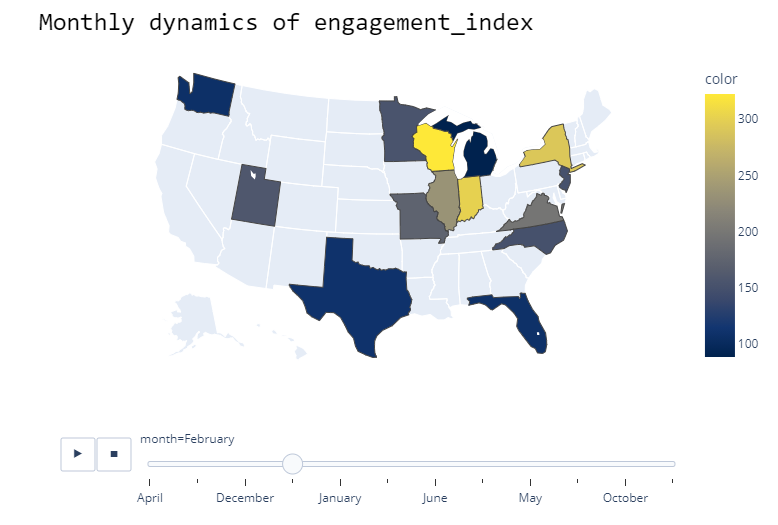
## What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
- Students from rural areas are the most interested in distance learning, while students from cities are the least interested. 
- The activity indicators of students from cities decreased by 74.3% and 60%, while the percentage of students in rural areas who had at least one page-load decreased by 32.4% and the indicator mean of total page-loaded events per one thousand students increased by 3.3%.
- Therefore, COVID-19 even affected the decrease in the activity of those students who studied remotely before the pandemic. Many students saw an opportunity to relax, and they used it.

## How does student engagement with different types of education technology change over the course of the pandemic?
- As for the future of distance learning, already at the beginning of the academic year 2020-2021 we see absolutely normal indicators that should not change much anymore.

## How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
- Students in rural areas are more interested by distance education thanks to the space from educational institutions that are more accessible within the town therefore were more prepared for distance learning, because it wasn't something new for them, except for most students from cities it had been.

## Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?
- Educational institutions in cities, like many other socially and economically important places, were closed primarily to limit the spread of the coronavirus, which should have led to the reform of education and thus the introduction of distance learning on the size of the entire country.
- Generally , thanks to the closure of educational institutions, there should are an enormous increase within the activity of scholars in distance learning

# The detailed exploratory interactive html report can be found [here](https://www.kaggleusercontent.com/kf/73959275/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..hwMC8qvoD6YS9tan_jQwuw.kfdGHO2N79o51ig7IHTKClLKkKwK_DQepIvPF8lZ0hZGK0ElYjlzVhIWoNUJVDa_wV-L-0AaeEWY5UQeAT7upu-VBun-WgMzhR0boSDtGtJeziCNJglcvyWwhEE0XRLwr-i4fiV1LVMkS9anZ627SwGrfUQSTZEwN6xFV_RArkYjiLarSLrDn7eVEYMk8eLPpbY93lD7jo6Cb6AU7cNy2vTVzlDuJ4oXrOk5ez3sQKXMOX-WoC8A590ogB8_iVpqPeuPelMPlFrLbOspMP8_ZF_lfS75-qLPZI2ljVJUiwDotuOXtCepyuPgCGjNhcpTwwTiPxVBLZqjI5iKFDqbS9ov__W_QgVeHMqkk4wIUmronLk6hi9uK0skOsLxHbd48jWbvr94bvce9a4XT6ZgR6BCR83vy1137uFDcLcMn-uytbhPtDDr_sF_NZIUoXruhPspQ11KudWXr_98bt1VBe_eZFit01GlPzOmIqcRiakysO0m2JOn5lBfyld7ZPhpIOUFi8f2wu7z9SL7FhdjeoXqQUduGbOU3EXSs51E28LDWbkjTVuT_KwnXxxCzsoZqaX_4Zo3m_IHnHu_5UwcvIOuB_ACS6xrIKGAyOX9zQ_SRmxwLlDBeV-EYjfVRAZGFER9y13hgWPLU_u9YqJJaicgcWujrhrCqT-zKFVhH4AYWpGQgkKsrB5mm89EVp46.A2U3LFg_dIIKaVctQK99sA/EDA%20LearnPlatform%20Covid-19%20Impact%20on%20Digital%20Learn.html).

# acknowledgement

- [10 Academy](https://www.10academy.org/)
- https://gist.github.com/rogerallen/1583593
- https://www.kaggle.com/dmitryuarov/eda-covid-19-impact-on-digital-learning
- https://www.youtube.com/watch?v=AYalukmWroY
